# Implement a simple CNN and understand its applications in image recognition (MNIST dataset)






Epoch 1/5


1500/1500 [==============================] - 15s 9ms/step - loss: 0.1605 - accuracy: 0.9510 - val_loss: 0.0738 - val_accuracy: 0.9794
Epoch 2/5
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0500 - val_accuracy: 0.9858
Epoch 3/5
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0363 - accuracy: 0.9885 - val_loss: 0.0504 - val_accuracy: 0.9863
Epoch 4/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0419 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.9904
Test Accuracy: 0.9904
1/1 [==============================] - 0s 182ms/step


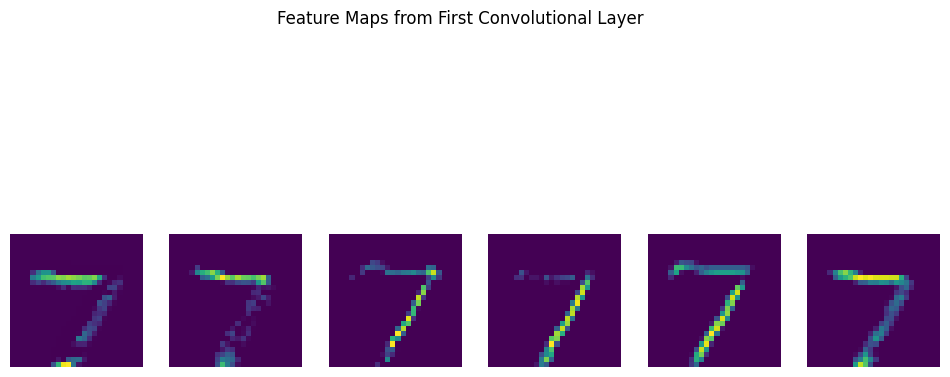

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset from the internet
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to fit CNN input [samples, height, width, channels]
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Visualize learned filters (activations of first Conv2D layer)
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
# activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)
activation_model = keras.Model(inputs=model.layers[0].input, outputs=layer_outputs)


# Select a test image
img = X_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

# Plot first convolutional layer activations
first_layer_activation = activations[0][0]  # shape: (height, width, filters)

fig, axes = plt.subplots(1, min(6, first_layer_activation.shape[-1]), figsize=(12, 6))
for i in range(len(axes)):
    axes[i].imshow(first_layer_activation[:, :, i], cmap='viridis')
    axes[i].axis('off')
plt.suptitle("Feature Maps from First Convolutional Layer")
plt.show()
